# Contact tracing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_json('locationdata.json')

In [2]:
# Have a first look at the data
df.head()

id        x        y
0    Jenkins  28.7863  10.7978
1    Delaney  14.2429  28.2985
2      Davis   1.9867   6.2979
3  Hernandez  18.9664  17.1344
4    Louella  28.3095   1.0767

In [3]:
df.tail()

id        x        y
45  Ortega   4.6419  13.0922
46  Torres  18.0926  23.5754
47    Lora   7.0347   6.5794
48  Medina  28.7107  29.6394
49    Dena   0.9164   0.1971

In [4]:
df.describe()

x          y
count  50.000000  50.000000
mean   13.808066  13.689598
std     8.260639   9.434389
min     0.332700   0.126400
25%     6.484925   5.333300
50%    13.859200  11.715800
75%    18.872700  23.334625
max    28.786300  29.639400

### Let's visualize the data in a scatter plot using Seaborn
Requirements:
- Figure size of 8x6
- x-axis is 'x' and y-axis is 'y'
- Legend by 'id'

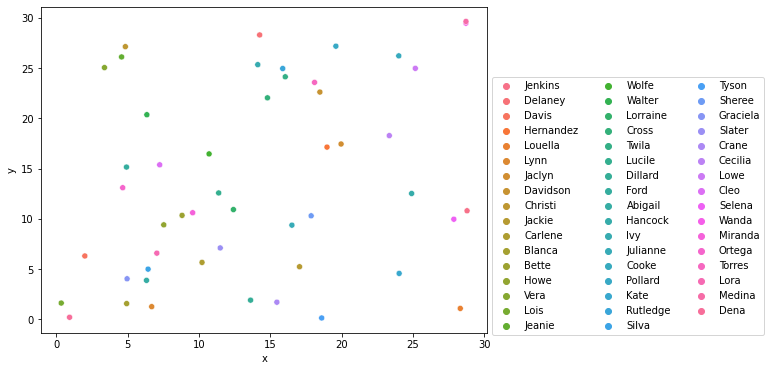

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', data=df, hue='id')
plt.legend(bbox_to_anchor=[1, 0.8], ncol=3)
plt.show()

### Define the model
Let's define the model using DBSCAN algorithm. In this case:
- We want to trace the persons who have a distance of 1.5 meters to an infected patient.
- For each cluster, there are minimum of 2 samples to be formed.
- The utilized metric is 'euclidian'.

In [6]:
model = DBSCAN(eps=1.5, min_samples=2, metric='euclidean').fit(df[['x', 'y']])
labels = model.labels_
df['cluster'] =labels.tolist()

### Plot the model with legend by 'cluster'

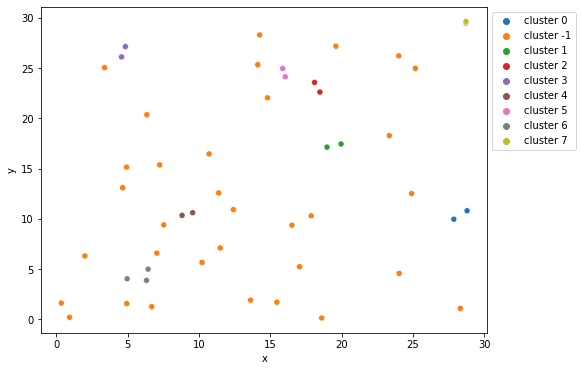

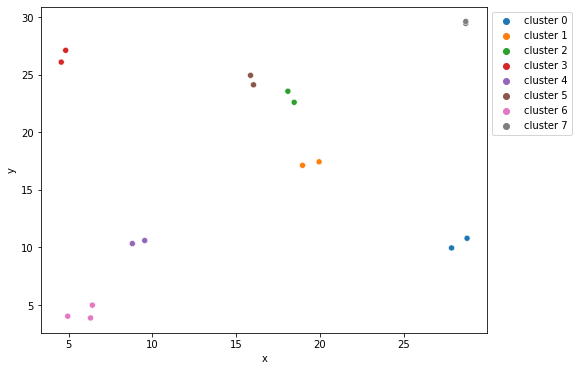

In [7]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(df['x'], df['y'], hue = ['cluster {}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

#drop datapoints, that don't represent an actual cluster.
dfm = df.drop(df[df['cluster'] == -1].index)
fig = plt.figure(figsize=(8,6))
sns.scatterplot(dfm['x'], dfm['y'], hue = ['cluster {}'.format(x) for x in dfm['cluster']])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

# Tracing infected people
Let's find people who had close contact with the infected patient. In this case we’ll define the function 'get_infected_names' whose input is the name of an infected patient:

In [8]:
def get_infected_names():   
    infected_name = input()
    while (infected_name not in df['id'].tolist()):
        print('No name found! Please do again!')
        infected_name = input()
    
    infected_name_clusters = [] 
    
    for i in range(len(df)):
        if df['id'][i] == infected_name:
            if df['cluster'][i] in infected_name_clusters:
                pass
            else:
                infected_name_clusters.append(df['cluster'][i])         
    
    infected_list = []
    for cluster in infected_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range (len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_list) and (member_id != infected_name):
                    infected_list.append(member_id)
                else:
                    pass
                
    return infected_list

In [10]:
get_infected_names()

['Silva', 'Graciela']